## **Business Case: Predict whether a patient is having heart disease 

\

### **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### **Importing the dataset**

In [2]:
data_x = pd.read_csv('values.csv')
data_y = pd.read_csv('labels.csv')

In [3]:
data_y

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [4]:
data = pd.concat([data_x,data_y['heart_disease_present']],axis = 1)
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


### **Domain Analysis**


1.   **patient_id** : the column is a unique and random identifier.
2.   slope_of_peak_exercise_st_segment [**slope**] (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
3.  **thal** (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect
4.  resting_blood_pressure [**bp**] (type: int): resting blood pressure
5.  chest_pain_type [**cp**] (type: int): chest pain type (4 values)
6.  num_major_vessels [**major_vessels**] (type: int): number of major vessels (0-3) colored by flourosopy
7.  fasting_blood_sugar_gt_120_mg_per_dl [**fbs**] (type: binary): fasting blood sugar > 120 mg/dl
8.  resting_ekg_results [**rest_ecg**] (type: int): resting electrocardiographic results (values 0,1,2)
9.  serum_cholesterol_mg_per_dl [**cholesterol**] (type: int): serum cholestoral in mg/dl
10.  oldpeak_eq_st_depression [**oldpeak**] (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
11.  sex (type: binary): 0: female, 1: male
12.  age (type: int): age in years
13.  max_heart_rate_achieved [**heart rate**] (type: int): maximum heart rate achieved (beats per minute)
14.  exercise_induced_angina [**agina**] (type: binary): exercise-induced chest pain (0: False, 1: True)

### **Basic checks**

In [5]:
data.shape

(180, 15)

In [6]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [7]:
data.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [8]:
data.drop('patient_id', axis=1,inplace=True)

In [9]:
data.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [10]:
data.rename(columns = {'slope_of_peak_exercise_st_segment' : 'slope', 'resting_blood_pressure' : 'bp', 'chest_pain_type' : 'cp', 'num_major_vessels' : 'major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl' : 'fbs', 'resting_ekg_results' : 'rest_ecg', 'serum_cholesterol_mg_per_dl' : 'cholesterol', 'oldpeak_eq_st_depression' : 'oldpeak', 'max_heart_rate_achieved' : 'heart_rate', 'exercise_induced_angina' : 'angina','heart_disease_present' : 'target'}, inplace = True)
data.head()

,slope,thal,bp,cp,major_vessels,fbs,rest_ecg,cholesterol,oldpeak,sex,age,heart_rate,angina,target
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [11]:
data.dtypes

slope              int64
thal              object
bp                 int64
cp                 int64
major_vessels      int64
fbs                int64
rest_ecg           int64
cholesterol        int64
oldpeak          float64
sex                int64
age                int64
heart_rate         int64
angina             int64
target             int64
dtype: object

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   slope          180 non-null    int64  
 1   thal           180 non-null    object 
 2   bp             180 non-null    int64  
 3   cp             180 non-null    int64  
 4   major_vessels  180 non-null    int64  
 5   fbs            180 non-null    int64  
 6   rest_ecg       180 non-null    int64  
 7   cholesterol    180 non-null    int64  
 8   oldpeak        180 non-null    float64
 9   sex            180 non-null    int64  
 10  age            180 non-null    int64  
 11  heart_rate     180 non-null    int64  
 12  angina         180 non-null    int64  
 13  target         180 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 19.8+ KB


In [13]:
data.isnull().sum()

slope            0
thal             0
bp               0
cp               0
major_vessels    0
fbs              0
rest_ecg         0
cholesterol      0
oldpeak          0
sex              0
age              0
heart_rate       0
angina           0
target           0
dtype: int64

 **Insight:There are no missing values**

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
slope,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
bp,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
cp,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fbs,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
rest_ecg,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
cholesterol,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0
age,180.0,54.811111,9.334737,29.0,48.00,55.0,62.00,77.0


**Insights:**

*   **The mean age of patients in the dataset is around 55 years, with the minimum age being 29 years and the maximum age being 77 years.**
*   **The mean resting blood pressure is 131 mm Hg, with the minimum being 94 mm Hg and the maximum being 180 mm Hg.**
*   **The mean serum cholesterol level is 249 mg/dL, with the minimum being 126 mg/dL and the maximum being 564 mg/dL.**
*   **The mean ST depression induced by exercise relative to rest is 1.01 mm, with the minimum being 0.0 mm and the maximum being 6.2 mm.**
*   **The mean number of major vessels (0-3) colored by flourosopy is 0.7, with the minimum being 0 and the maximum being 3.**

In [15]:
data['target'].unique()

array([0, 1], dtype=int64)

* **_Clearly, this is a classification problem, with the target variable having values '0' and '1'._**
* **0 - no heart disease present**
* **1 - heart disease present**

In [16]:
data['target'].value_counts()

0    100
1     80
Name: target, dtype: int64

* **_Clearly this data is slightly imbalanced._**
* **_There are more observations related to heart disease absent and less observations related to heart disease present._**

In [17]:
# checking the correlation between columns
data.corr()['target'].abs().sort_values(ascending=False)

target           1.000000
angina           0.448647
major_vessels    0.421519
cp               0.412829
oldpeak          0.382930
heart_rate       0.375352
slope            0.344224
sex              0.335421
rest_ecg         0.145933
age              0.138255
cholesterol      0.079775
bp               0.078506
fbs              0.003379
Name: target, dtype: float64

**Insights:**
* **As you can see, the 'angina' variable (exercise_induced_angina) has the highest correlation with the target variable**
* **This shows that most columns are moderately correlated with target, but 'blood_sugar' is very weakly correlated.**

## **Exploratory Data Analysis (EDA)**

## Analysing Input Variables

In [18]:
data1=data.drop(['thal','target'],axis=1)
data1

,slope,bp,cp,major_vessels,fbs,rest_ecg,cholesterol,oldpeak,sex,age,heart_rate,angina
0,1,128,2,0,0,2,308,0.0,1,45,170,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1
3,1,152,4,0,0,0,223,0.0,1,40,181,0
4,3,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,125,4,2,1,0,254,0.2,1,67,163,0
176,2,180,4,0,0,1,327,3.4,0,55,117,1
177,2,125,3,0,0,0,309,1.8,1,64,131,1
178,1,124,3,2,1,0,255,0.0,1,48,175,0


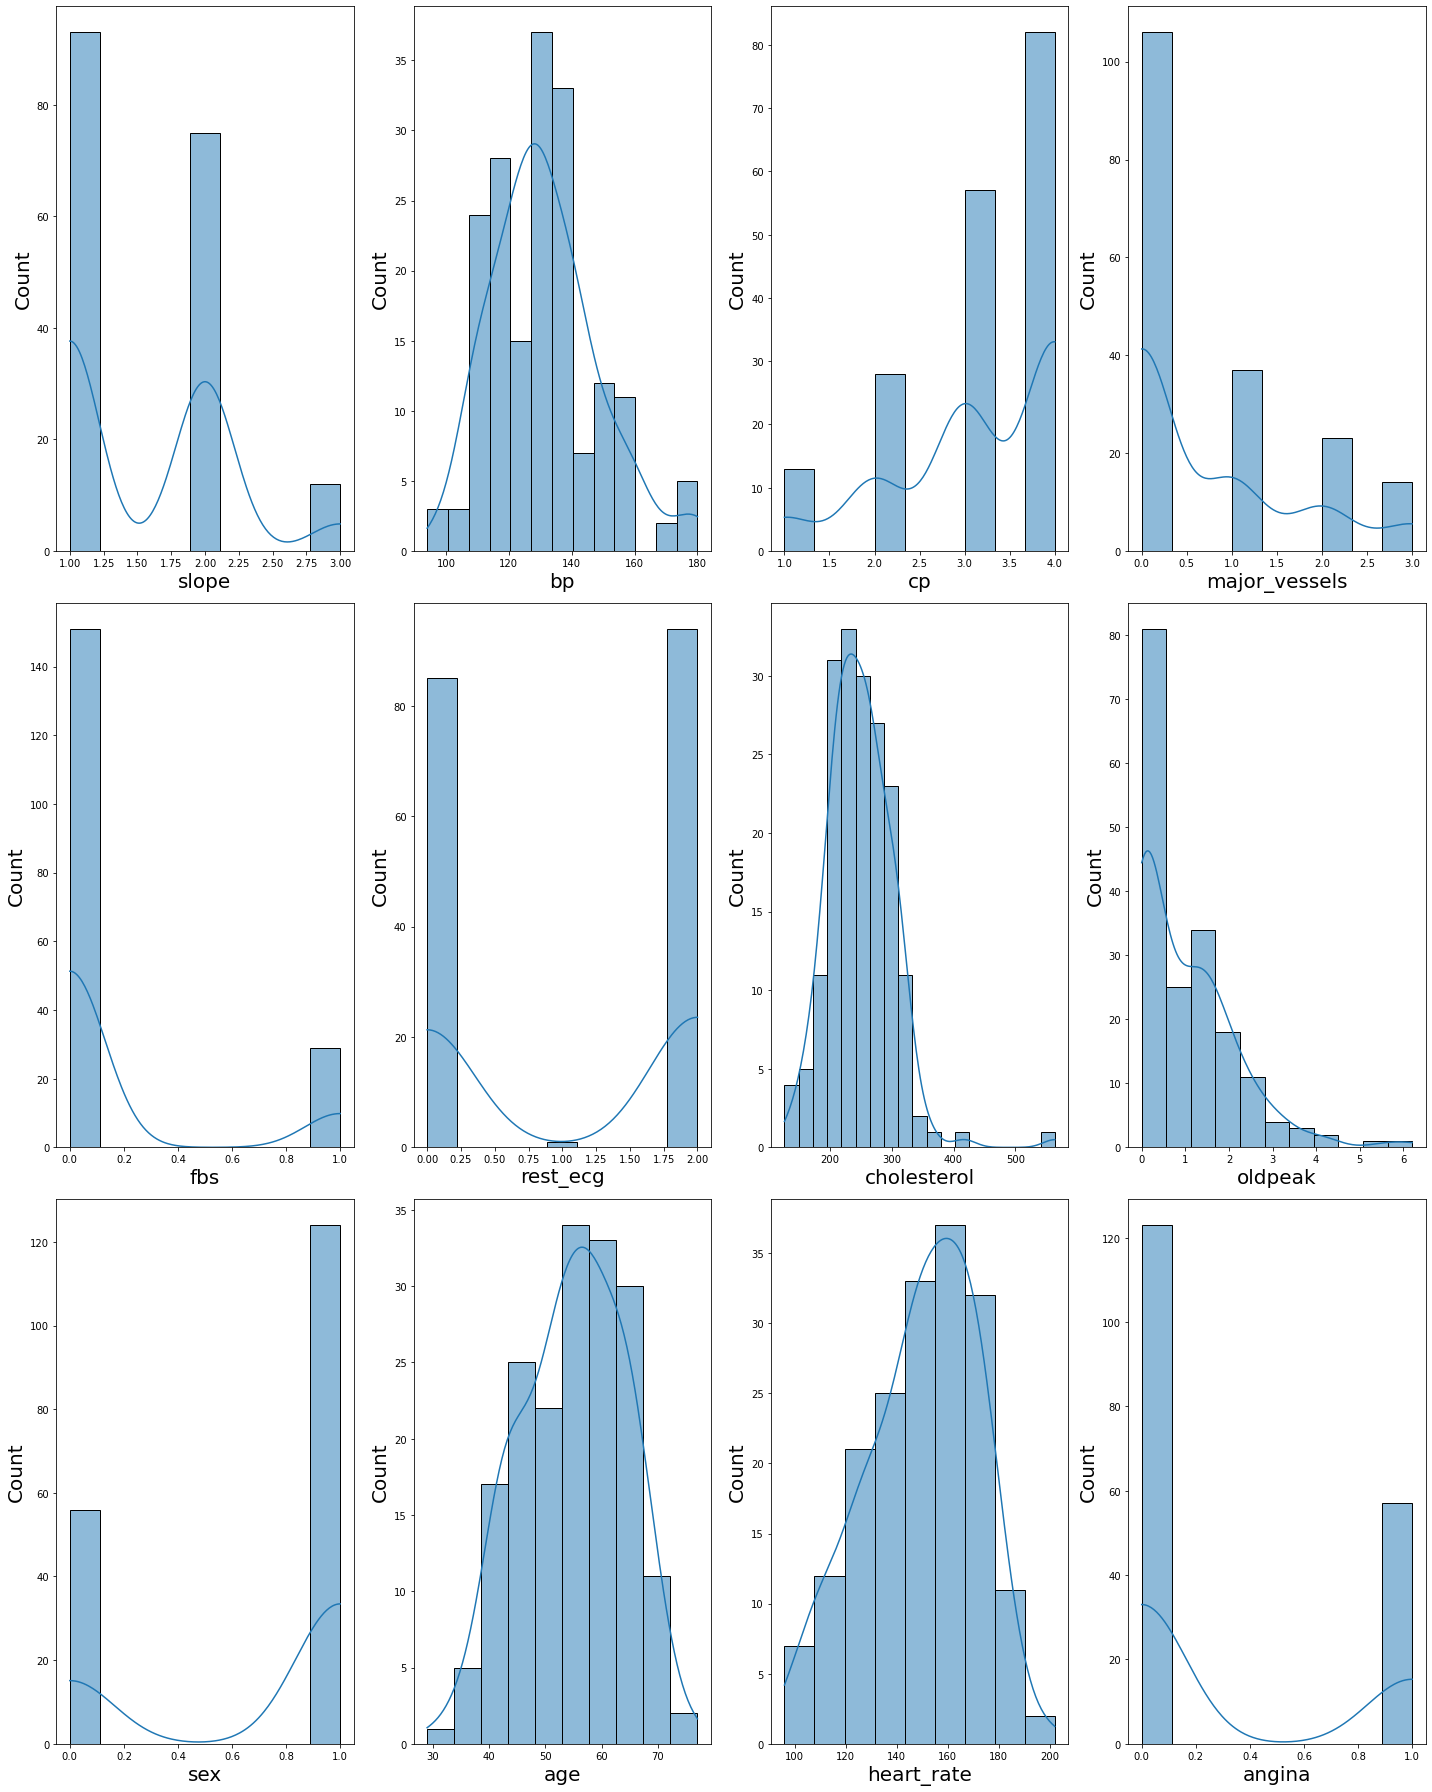

In [19]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data1:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.histplot(x=data1[column],data=data1,kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Analysing the target variable:

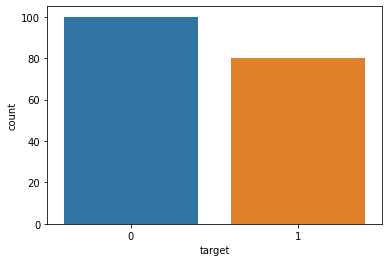

0    100
1     80
Name: target, dtype: int64


In [20]:
y=data["target"]
sns.countplot(data=data,x=y)
plt.show()
temp=data['target'].value_counts()
print(temp)

In [21]:
print("Percentage of patience without heart problems: "+str(round(temp[0]*100/180,2)))
print("Percentage of patience with heart problems: "+str(round(temp[1]*100/180,2)))

Percentage of patience without heart problems: 55.56
Percentage of patience with heart problems: 44.44


## Analysing the slope Feature

In [22]:
data['slope'].value_counts()

1    93
2    75
3    12
Name: slope, dtype: int64

<AxesSubplot:xlabel='slope', ylabel='target'>

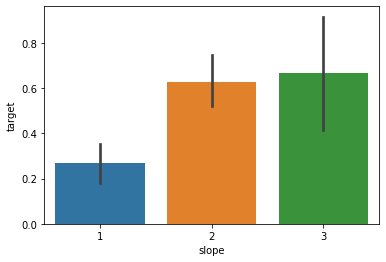

In [23]:
sns.barplot(data=data,x="slope",y="target")

## Insight:

People with Slope '3' causes heart disease much more than Slope '1' and '2'

## Analysing thal feature

In [24]:
data['thal'].value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

<AxesSubplot:xlabel='thal', ylabel='count'>

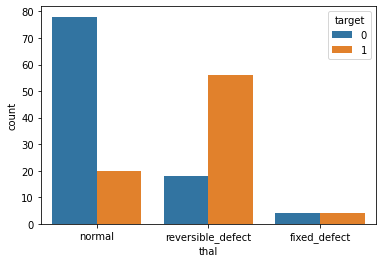

In [25]:
sns.countplot(data=data,x="thal",hue="target")

### **Insight**:
   * **Patients with 'normal' thal values have the highest chance of having no heart disease.**
   * **Patients with 'reversible_defect' thal values have the highest chance of having heart disease.**
   * **Patients with 'fixed_defect' thal values have the equal chance of having heart disease or not having heart disease.**

# Analysing cp Feature


In [26]:
data.cp.value_counts()

4    82
3    57
2    28
1    13
Name: cp, dtype: int64

<AxesSubplot:xlabel='cp', ylabel='count'>

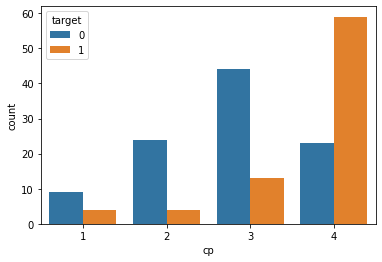

In [27]:
sns.countplot(data=data,x="cp",hue="target")

### **Insights**:
   * **People with chest pain type 4 have the highest chance of having heart disease.**
   * **People with chest pain type 1 & 2 have the lowest chance of having heart disease.**
   * **People with chest pain type 3 have the highest chance of having no heart disease.**
   * **People with chest pain type 1 have the lowest chance of having no heart disease.**
    

## Analysing major_vessels Feature

In [28]:
data.major_vessels.value_counts()

0    106
1     37
2     23
3     14
Name: major_vessels, dtype: int64

<AxesSubplot:xlabel='major_vessels', ylabel='count'>

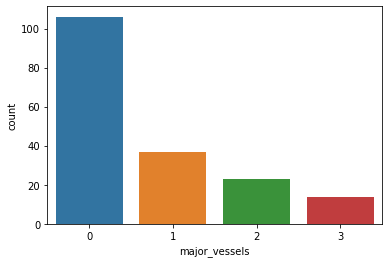

In [29]:
sns.countplot(data=data,x=data['major_vessels'])

<AxesSubplot:xlabel='major_vessels', ylabel='target'>

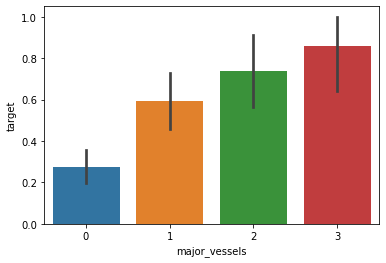

In [30]:
sns.barplot(data=data,x=data['major_vessels'],y="target")

### **Insights**:
  * **People with 3 major vessels are more prone to heart diseases.**

## Analysing fbs Feature

In [31]:
data.fbs.value_counts()

0    151
1     29
Name: fbs, dtype: int64

<AxesSubplot:xlabel='fbs', ylabel='count'>

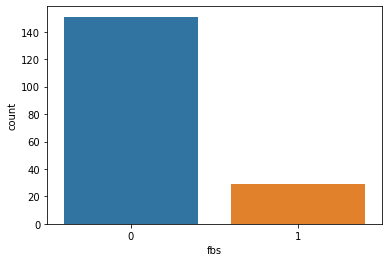

In [32]:
sns.countplot(x=data['fbs'])

<AxesSubplot:xlabel='fbs', ylabel='target'>

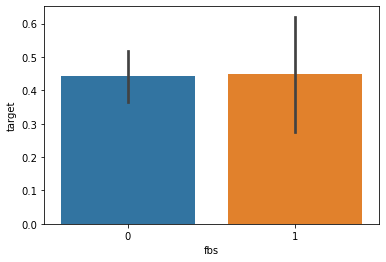

In [33]:
sns.barplot(data=data,x=data['fbs'],y="target")

# Analysing rest_ecg Feature

In [34]:
data.rest_ecg.value_counts()

2    94
0    85
1     1
Name: rest_ecg, dtype: int64

<AxesSubplot:xlabel='rest_ecg', ylabel='count'>

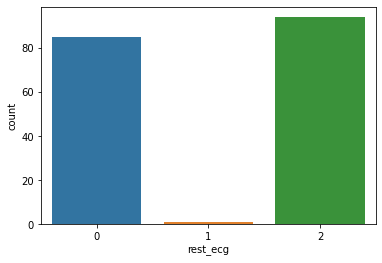

In [35]:
sns.countplot(x=data['rest_ecg'])

<AxesSubplot:xlabel='rest_ecg', ylabel='target'>

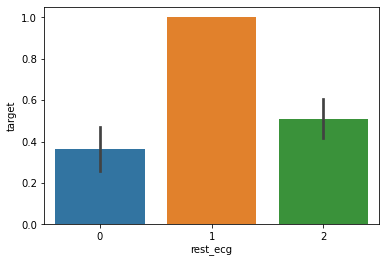

In [36]:
sns.barplot(data=data,x=data['rest_ecg'],y="target")

**Insights**:
   * **People with resting electrocardiographic value 1 are more likely to have heart disease.**

## Analysing sex Feature

In [37]:
data.sex.value_counts()

1    124
0     56
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

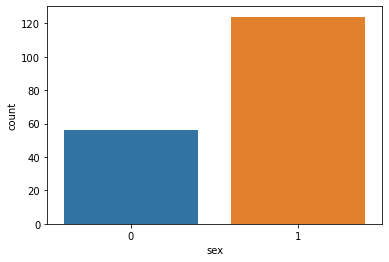

In [38]:
sns.countplot(x=data['sex'])

<AxesSubplot:xlabel='sex', ylabel='target'>

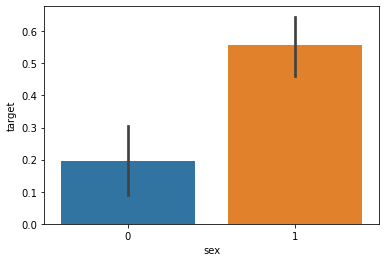

In [39]:
sns.barplot(data=data,x=data['sex'],y="target")

## Analysing angina Feature

In [40]:
data.angina.value_counts()

0    123
1     57
Name: angina, dtype: int64

<AxesSubplot:xlabel='angina', ylabel='count'>

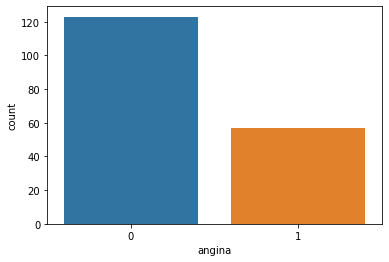

In [41]:
sns.countplot(x=data['angina'])

<AxesSubplot:xlabel='angina', ylabel='target'>

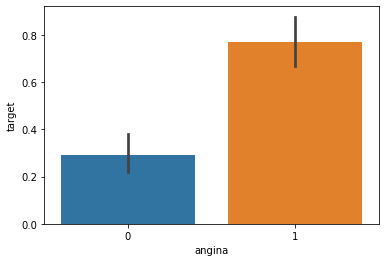

In [42]:
sns.barplot(data=data,x=data['angina'],y="target")

**Insights:**
 * **Patients having excercise induced chest pain are more prone to heart diseases.**

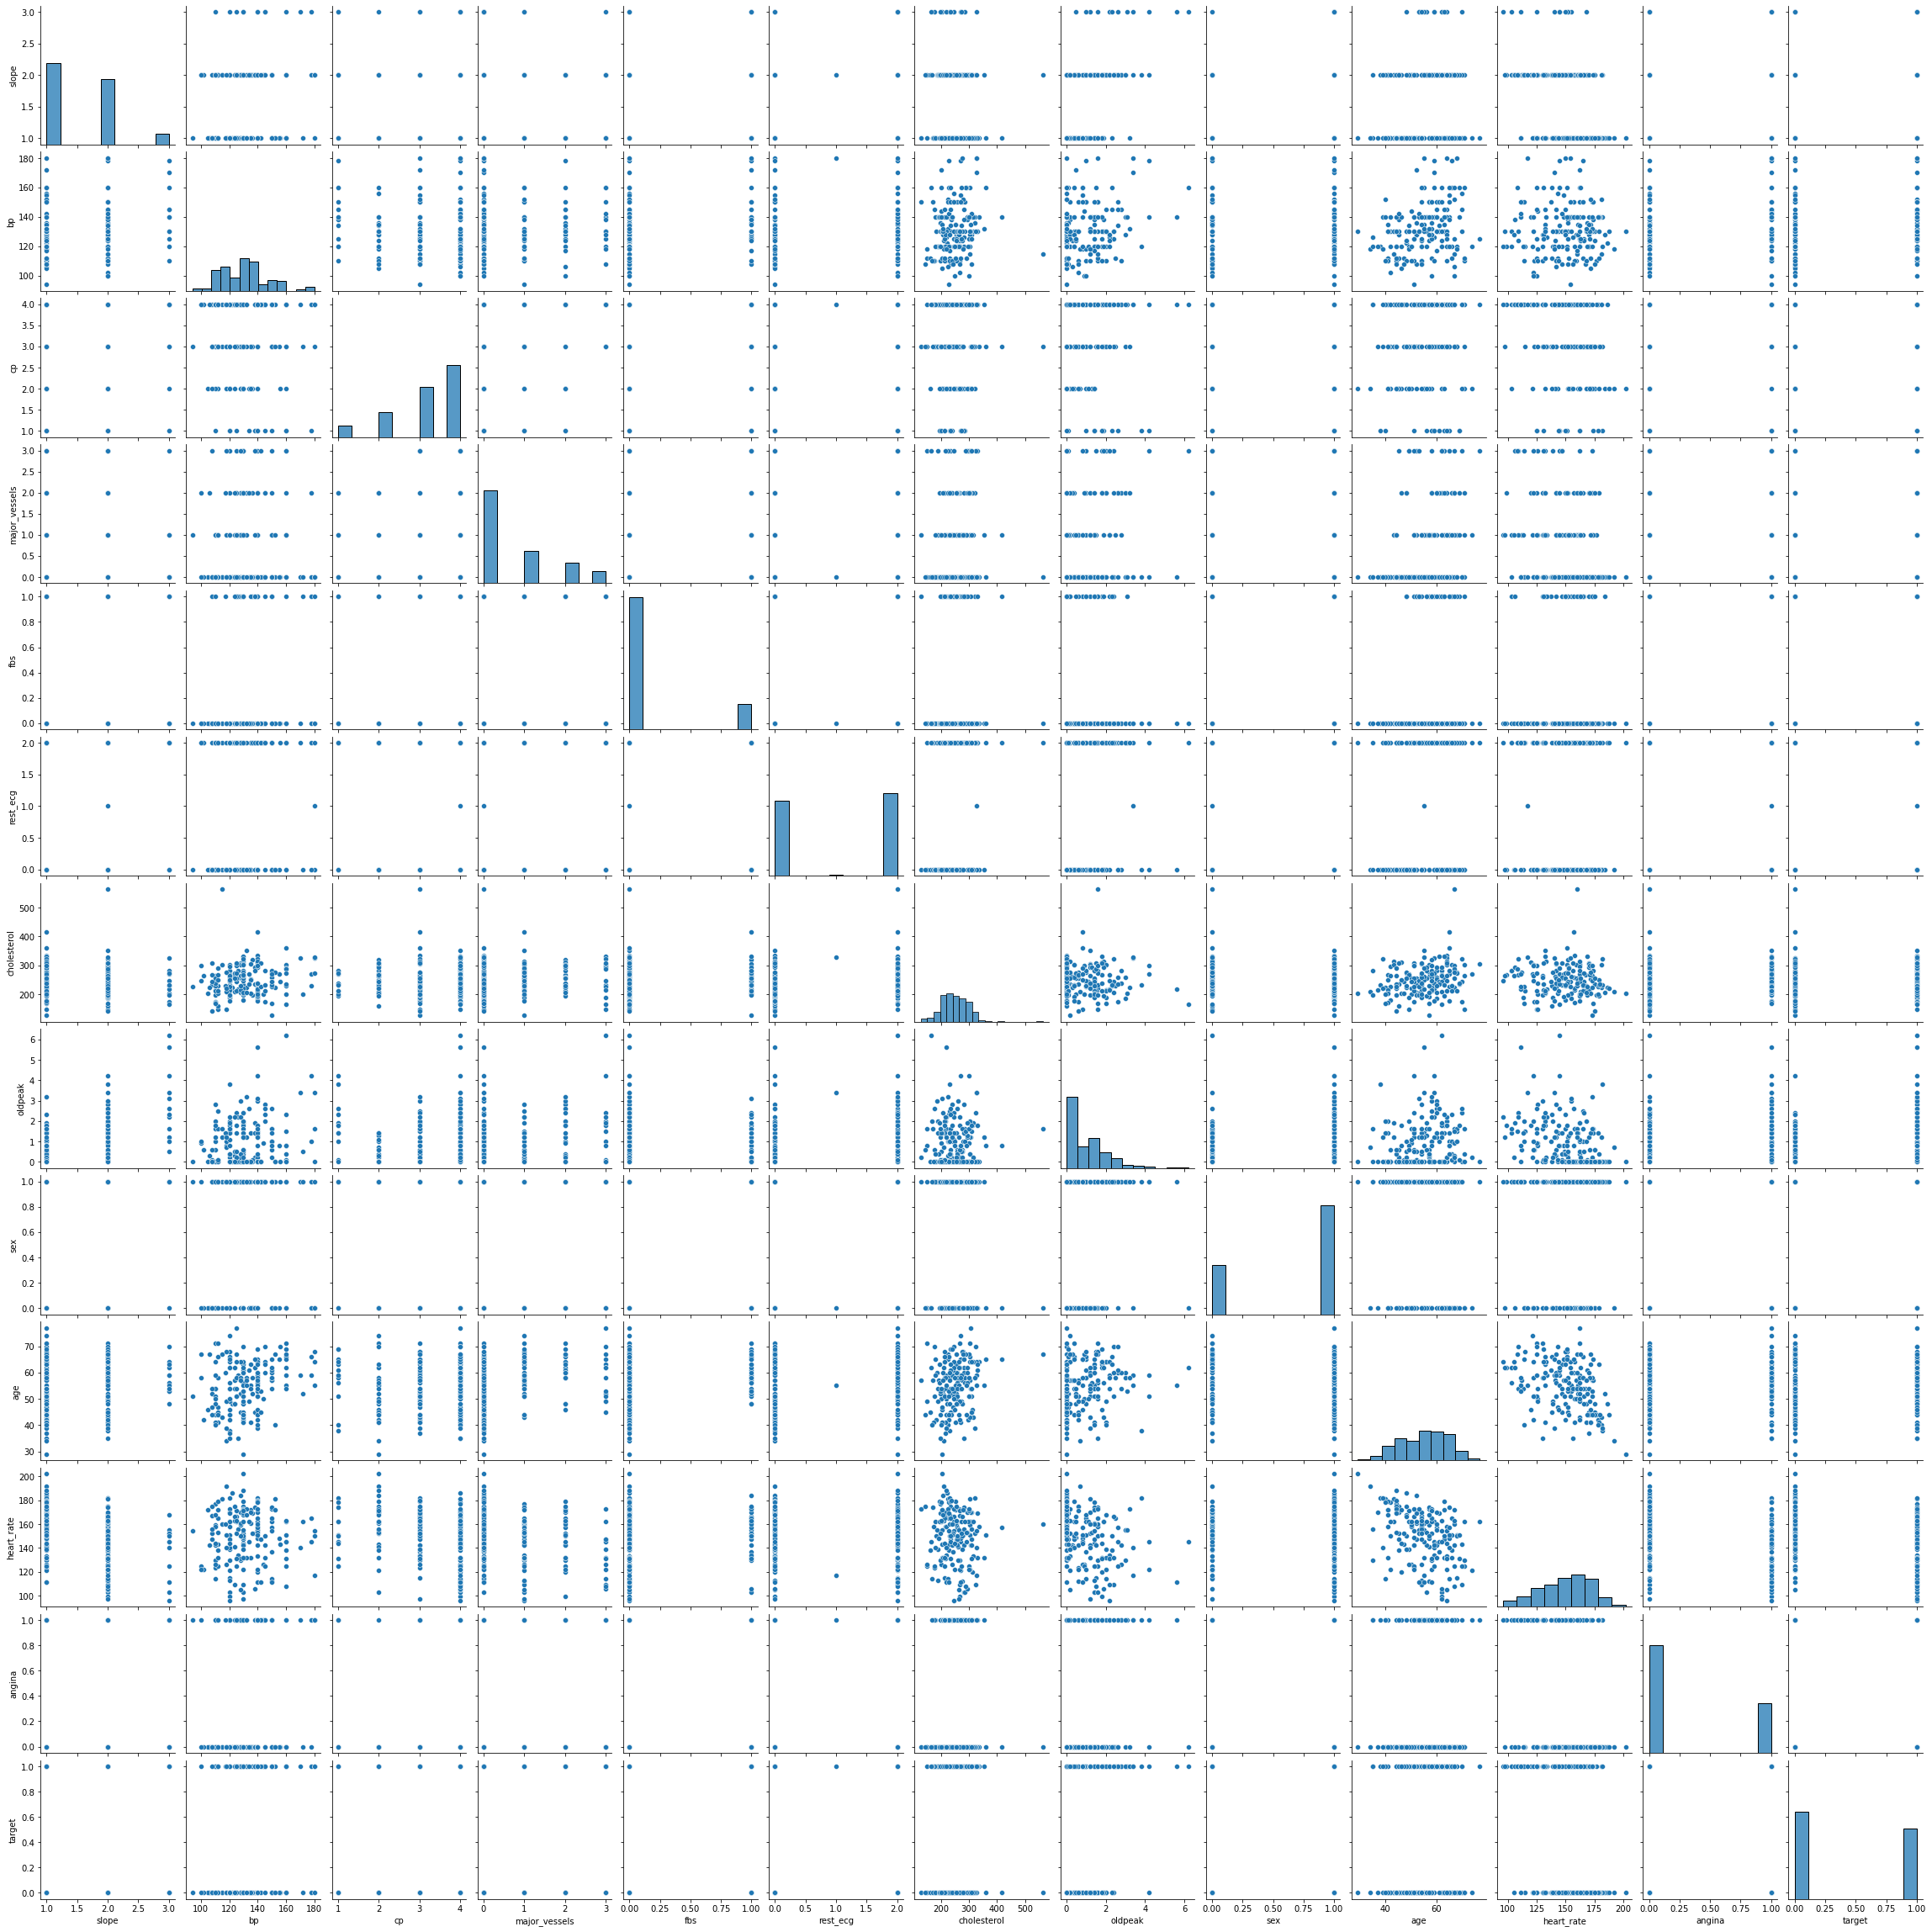

In [43]:
sns.pairplot(data)

## Data Preprocessing

### check for duplicates


In [44]:
data.duplicated().sum()

0

### Handling the Categorical Feature

In [45]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [46]:
enc=LabelEncoder()
data["thal"]=enc.fit_transform(data["thal"])

In [47]:
data

,slope,thal,bp,cp,major_vessels,fbs,rest_ecg,cholesterol,oldpeak,sex,age,heart_rate,angina,target
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,1,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,2,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,1,124,3,2,1,0,255,0.0,1,48,175,0,0


In [48]:
data.head()

,slope,thal,bp,cp,major_vessels,fbs,rest_ecg,cholesterol,oldpeak,sex,age,heart_rate,angina,target
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0


# Feature engineering¶

In [49]:
data.corr()

,slope,thal,bp,cp,major_vessels,fbs,rest_ecg,cholesterol,oldpeak,sex,age,heart_rate,angina,target
slope,1.000000,0.154101,0.098287,0.121207,0.076832,0.050199,0.172191,-0.032348,0.615948,0.093340,0.169918,-0.418102,0.225459,0.344224
thal,0.154101,1.000000,-0.006088,0.269583,0.174107,-0.070225,-0.052171,0.046448,0.251972,0.265420,-0.007934,-0.142098,0.360395,0.447214
bp,0.098287,-0.006088,1.000000,-0.029296,0.042388,0.166570,0.078986,0.144881,0.219026,-0.055589,0.284402,-0.017521,0.123397,0.078506
cp,0.121207,0.269583,-0.029296,1.000000,0.249061,-0.088992,0.033379,0.061213,0.080799,0.086057,0.085001,-0.301792,0.346266,0.412829
major_vessels,0.076832,0.174107,0.042388,0.249061,1.000000,0.169792,0.096656,0.098348,0.214062,0.073107,0.347355,-0.275687,0.153407,0.421519
fbs,0.050199,-0.070225,0.166570,-0.088992,0.169792,1.000000,0.053864,0.027560,-0.039055,0.066010,0.176101,0.058369,-0.005956,0.003379
rest_ecg,0.172191,-0.052171,0.078986,0.033379,0.096656,0.053864,1.000000,0.170839,0.097321,0.045786,0.126856,-0.102766,0.037773,0.145933
cholesterol,-0.032348,0.046448,0.144881,0.061213,0.098348,0.027560,0.170839,1.000000,-0.021932,-0.152296,0.236211,-0.071038,0.083139,0.079775
oldpeak,0.615948,0.251972,0.219026,0.080799,0.214062,-0.039055,0.097321,-0.021932,1.000000,0.099374,0.189700,-0.341045,0.249167,0.382930
sex,0.093340,0.265420,-0.055589,0.086057,0.073107,0.066010,0.045786,-0.152296,0.099374,1.000000,-0.148997,-0.053960,0.251096,0.335421


<AxesSubplot:>

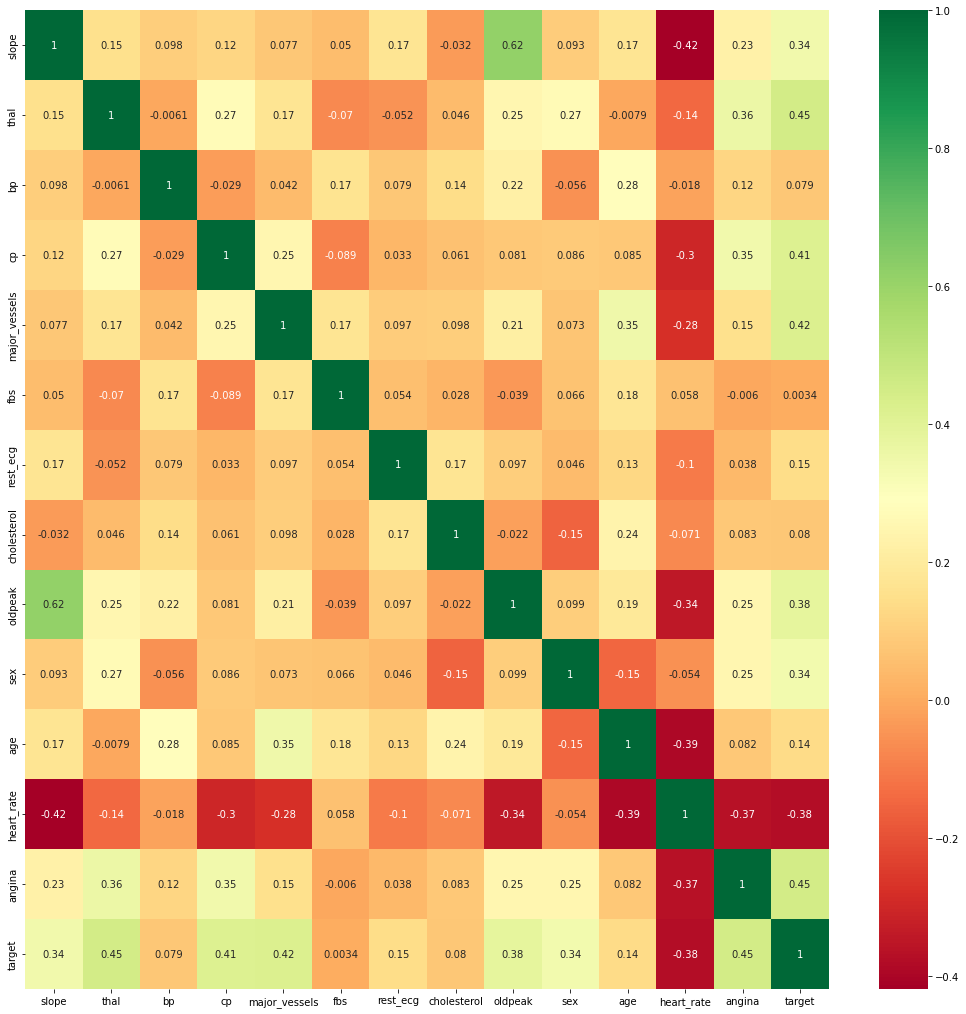

In [50]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")


### splitting data into x and y

In [51]:
x=data.drop('target',axis=1)
y=data.target
print(x.shape)
print(y.shape)

(180, 13)
(180,)


In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=42)

In [53]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [54]:
x_train.shape

(162, 13)

In [55]:
x_test.shape

(18, 13)

In [56]:
y_train.shape

(162,)

In [57]:
y_test.shape

(18,)

# Balancing the Data

In [58]:
from imblearn.over_sampling import SMOTE,ADASYN,RandomOverSampler
from collections import Counter
smote=SMOTE(random_state=4)
x_sm,y_sm=smote.fit_resample(x_train,y_train)
print("balanced before :",Counter(y_train))
print("balanced after :",Counter(y_sm))

balanced before : Counter({0: 92, 1: 70})
balanced after : Counter({1: 92, 0: 92})


# Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(penalty="l1",solver="saga")

lr.fit(x_sm,y_sm)
train_predict=lr.predict(x_train)
test_predict=lr.predict(x_test)

from sklearn.metrics import accuracy_score
train=accuracy_score(y_train,train_predict)
test=accuracy_score(y_test,test_predict)
print("train accuracy :",train)
print("test accuracy :",test)

train accuracy : 0.845679012345679
test accuracy : 0.8888888888888888


In [60]:
from sklearn.metrics import f1_score,recall_score,precision_score,roc_auc_score,classification_report,confusion_matrix

In [61]:
accuracy_score(test_predict,y_test)

0.8888888888888888

In [62]:
confusion_matrix(test_predict,y_test)

array([[8, 2],
       [0, 8]], dtype=int64)

In [63]:
f1_score(train_predict,y_train)

0.8201438848920863

In [64]:
f1_score(test_predict,y_test)

0.888888888888889

In [65]:
report=classification_report(test_predict,y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.80      1.00      0.89         8

    accuracy                           0.89        18
   macro avg       0.90      0.90      0.89        18
weighted avg       0.91      0.89      0.89        18



In [66]:
score_lr=round(accuracy_score(test_predict,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is:"+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is:88.89 %


In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
mean_squared_error(y_test,test_predict)

0.1111111111111111

# Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',max_depth=200,min_samples_split=30,max_features=10,min_samples_leaf=30,
                          random_state=3)
dt.fit(x_sm,y_sm)
test_predict2 =dt.predict(x_test) 
train_predict2=dt.predict(x_train) 
test2=accuracy_score(y_test,test_predict2)
train2=accuracy_score(y_train,train_predict2)
print("test accuracy :",test2)
print("train accuracy :",train2)
print("f1_score :",f1_score(y_test,test_predict2))
print("recall_score :",recall_score(y_test,test_predict2))
print("precision_score :",precision_score(y_test,test_predict2))

test accuracy : 0.8333333333333334
train accuracy : 0.7592592592592593
f1_score : 0.8421052631578948
recall_score : 0.8
precision_score : 0.8888888888888888


## Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB

nb= BernoulliNB(alpha=30,binarize=0.4)

nb.fit(x_sm,y_sm)

test_predict3 =nb.predict(x_test) 
train_predict3=nb.predict(x_train) 
test3=accuracy_score(y_test,test_predict3)
train3=accuracy_score(y_train,train_predict3)
print("test accuracy :",test3)
print("train accuracy :",train3)
print("f1_score :",f1_score(y_test,test_predict3))
print("recall_score :",recall_score(y_test,test_predict3))
print("precision_score :",precision_score(y_test,test_predict3))

test accuracy : 0.8333333333333334
train accuracy : 0.8333333333333334
f1_score : 0.8235294117647058
recall_score : 0.7
precision_score : 1.0


In [71]:
report=classification_report(test_predict3,y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.70      1.00      0.82         7

    accuracy                           0.83        18
   macro avg       0.85      0.86      0.83        18
weighted avg       0.88      0.83      0.83        18



In [72]:
accuracy_score(test_predict3,y_test)

0.8333333333333334

### SVM

In [73]:
from sklearn.svm import SVC

svm=SVC(C=0.9,max_iter=50,gamma=0.009)

svm.fit(x_sm,y_sm)

SVC(C=0.9, gamma=0.009, max_iter=50)

In [74]:
train_predict4=svm.predict(x_train)
test_predict4=svm.predict(x_test)
train4=accuracy_score(y_train,train_predict4)
test4=accuracy_score(y_test,test_predict4)
print("train accuracy :",train4)
print("test accuracy :",test4)

train accuracy : 0.8580246913580247
test accuracy : 0.8888888888888888


In [75]:
report=classification_report(test_predict4,y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.80      1.00      0.89         8

    accuracy                           0.89        18
   macro avg       0.90      0.90      0.89        18
weighted avg       0.91      0.89      0.89        18



## K Nearest Neighbors

In [76]:
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_sm,y_sm)
    y_pred=knn.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))

In [77]:
error_rate

[0.3333333333333333,
 0.2777777777777778,
 0.1111111111111111,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.1111111111111111,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.1111111111111111,
 0.16666666666666666,
 0.16666666666666666]

Minimum error:- 0.1111111111111111 at K = 3


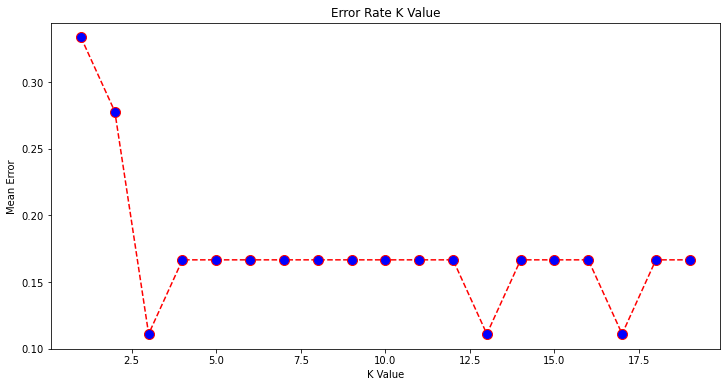

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,20), error_rate, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [79]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_sm,y_sm)

test_predict5 =knn.predict(x_test) 
train_predict5=knn.predict(x_train) 
test5=accuracy_score(y_test,test_predict5)
train5=accuracy_score(y_train,train_predict5)
print("test accuracy :",test5)
print("train accuracy :",train5)
print("f1_score :",f1_score(y_test,test_predict3))
print("recall_score :",recall_score(y_test,test_predict5))
print("precision_score :",precision_score(y_test,test_predict5))


test accuracy : 0.8888888888888888
train accuracy : 0.8827160493827161
f1_score : 0.8235294117647058
recall_score : 0.8
precision_score : 1.0


In [80]:
report=classification_report(test_predict5,y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.80      1.00      0.89         8

    accuracy                           0.89        18
   macro avg       0.90      0.90      0.89        18
weighted avg       0.91      0.89      0.89        18



# Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
from sklearn.model_selection import cross_val_score
rf= RandomForestClassifier(n_estimators=200,max_samples=150,max_depth=100,min_samples_leaf=40,min_samples_split=40,
                          random_state=3)
score=cross_val_score(rf,x,y,cv=10)

In [83]:
score.mean()

0.7722222222222223

In [84]:
rf.fit(x_sm,y_sm)
test_predict6=rf.predict(x_test) 
train_predict6=rf.predict(x_train) 
test6=accuracy_score(y_test,test_predict6)
train6=accuracy_score(y_train,train_predict6)
print("test accuracy :",test6)
print("train accuracy :",train6)
print("f1_score :",f1_score(y_test,test_predict6))
print("recall_score :",recall_score(y_test,test_predict6))
print("precision_score :",precision_score(y_test,test_predict6))

test accuracy : 0.8888888888888888
train accuracy : 0.8580246913580247
f1_score : 0.888888888888889
recall_score : 0.8
precision_score : 1.0


In [85]:
report4=classification_report(test_predict6,y_test)
print(report4)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.80      1.00      0.89         8

    accuracy                           0.89        18
   macro avg       0.90      0.90      0.89        18
weighted avg       0.91      0.89      0.89        18



In [88]:
n=data.drop(["bp","cholesterol","oldpeak","age","heart_rate"],axis=1)
n

,slope,thal,cp,major_vessels,fbs,rest_ecg,sex,angina,target
0,1,1,2,0,0,2,1,0,0
1,2,1,3,0,0,0,0,0,0
2,1,1,4,3,0,2,1,1,1
3,1,2,4,0,0,0,1,0,1
4,3,2,1,0,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...
175,2,2,4,2,1,0,1,0,1
176,2,1,4,0,0,1,0,1,1
177,2,2,3,0,0,0,1,1,1
178,1,1,3,2,1,0,1,0,0


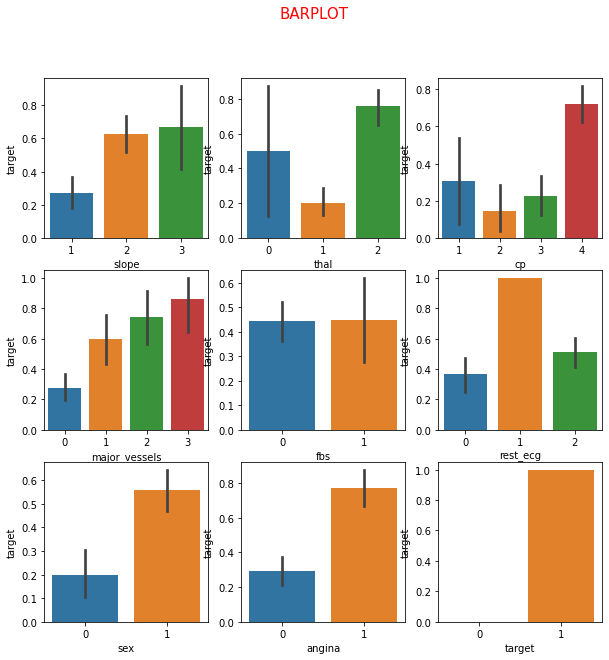

In [92]:
plt.figure(figsize=(10,10))
no=1
for i in n:
    if no<=16:
        plt.suptitle("BARPLOT",fontsize=15,color="red")
        plt.subplot(3,3,no)
        sns.barplot(x=n[i],y="target",data=data)
        plt.xlabel(i)
    no+=1